In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
#pip install openpyxl
df_offers = pd.read_excel(r"C:\pyml_scripts\WineKMC\WineKMC.xlsx", sheet_name=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

C:\Users\Admin\.conda\envs\pyml\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [3]:
df_offers['offer_id'].unique().size

32

In [4]:
df_transactions = pd.read_excel("C:\pyml_scripts\WineKMC\WineKMC.xlsx", sheet_name=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

C:\Users\Admin\.conda\envs\pyml\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


In [5]:
#合併產品表格與交易表格
#pd.merge預設以相同名字的欄位當作合併條件
df_all = pd.merge(df_offers, df_transactions)
df_all.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak,customer_name,n
0,1,January,Malbec,72,56,France,False,Thomas,1
1,1,January,Malbec,72,56,France,False,Jackson,1
2,1,January,Malbec,72,56,France,False,Mitchell,1
3,1,January,Malbec,72,56,France,False,Peterson,1
4,1,January,Malbec,72,56,France,False,Wood,1


In [6]:
df_all.count()

offer_id         324
campaign         324
varietal         324
min_qty          324
discount         324
origin           324
past_peak        324
customer_name    324
n                324
dtype: int64

In [7]:
#產生樞紐分析表用來得到每個客戶所購買的產品
df_pivot1 = df_all.pivot_table(index=['customer_name'], columns=['offer_id'], values='n')
df_pivot1

offer_id,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
Allen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Anderson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Bailey,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Baker,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Williams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Wilson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Wood,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [8]:
#太多空值,所以將空值變成0
df_pivot1 = df_pivot1.fillna(0)
x_cols = df_pivot1.columns[1:]

df_pivot1

offer_id,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Williams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Wilson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Wood,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
#使用聚類演算法將客戶依照購買葡萄酒偏好，分成5類
KMeans5 = KMeans(n_clusters=5).fit_predict(df_pivot1)
KMeans5

array([4, 0, 1, 4, 0, 2, 1, 0, 2, 4, 2, 1, 4, 3, 3, 1, 0, 1, 4, 2, 4, 0,
       2, 3, 1, 2, 0, 3, 0, 0, 0, 0, 2, 2, 0, 4, 2, 4, 3, 4, 1, 1, 0, 0,
       4, 2, 4, 0, 3, 3, 0, 2, 3, 1, 2, 0, 1, 0, 0, 0, 0, 0, 3, 0, 4, 1,
       1, 0, 2, 0, 0, 0, 2, 0, 0, 4, 1, 2, 0, 1, 2, 3, 0, 1, 4, 0, 4, 3,
       0, 0, 2, 0, 0, 4, 2, 2, 0, 0, 2, 2])

In [10]:
kpoints = list(KMeans5)
cluster_dict = {x:kpoints.count(x) for x in kpoints}
cluster_dict

{4: 16, 0: 37, 1: 15, 2: 21, 3: 11}

In [11]:
heights = list(cluster_dict.values())
heights

[16, 37, 15, 21, 11]

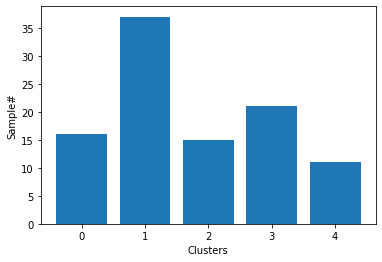

In [12]:
plt.bar(range(5),heights)
plt.xlabel('Clusters')
plt.ylabel('Sample#')
plt.show()

In [13]:
#使用pca降維，將原本32維度將成2維度，方便視覺化分析
pca2 = PCA(n_components = 2)
df_pivot1_pca2 = pca2.fit_transform(df_pivot1)

print(df_pivot1.shape)
print(df_pivot1_pca2.shape)

(100, 32)
(100, 2)


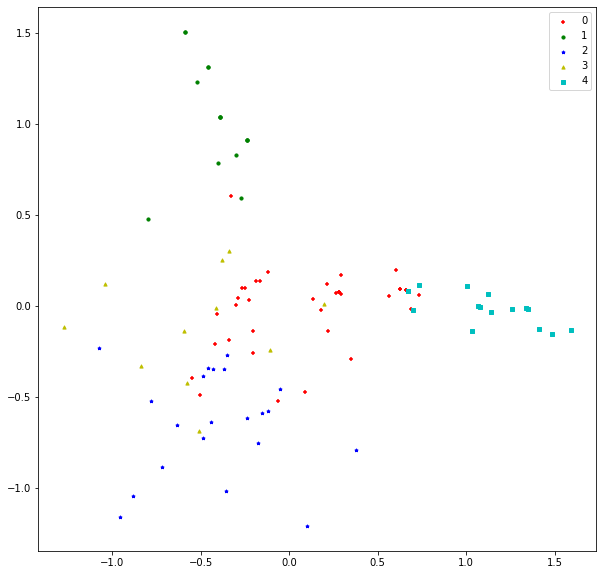

In [14]:
colors = ['r', 'g', 'b', 'y', 'c', 'm','k','p']
markers= ['+','o','*','^','s','p','D','>']
plt.figure(figsize=(10,10))

for i in range(5):
        points = np.array([df_pivot1_pca2[j] for j in range(len(df_pivot1_pca2)) if KMeans5[j] == i])
        plt.scatter(points[:, 0], points[:, 1], s=10, c=colors[i],marker=markers[i],label=i)
        
plt.legend()        
plt.show()

In [15]:
df_pivot1['cluster']=KMeans5
df_pivot1.head()

offer_id,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,cluster
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4
Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [16]:
df_pivot1.groupby('cluster').sum()

offer_id,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
cluster,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,2.0,3.0,2.0,3.0,5.0,10.0,5.0,4.0,...,2.0,0.0,2.0,1.0,2.0,2.0,4.0,4.0,7.0,2.0
1,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,12.0,0.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,4.0,6.0,1.0,8.0,3.0,3.0,2.0,2.0,...,2.0,0.0,2.0,1.0,5.0,1.0,0.0,3.0,7.0,1.0
3,5.0,4.0,0.0,3.0,1.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,2.0,2.0,1.0,3.0,1.0,2.0,3.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,11.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,13.0,0.0,0.0


<AxesSubplot:xlabel='cluster'>

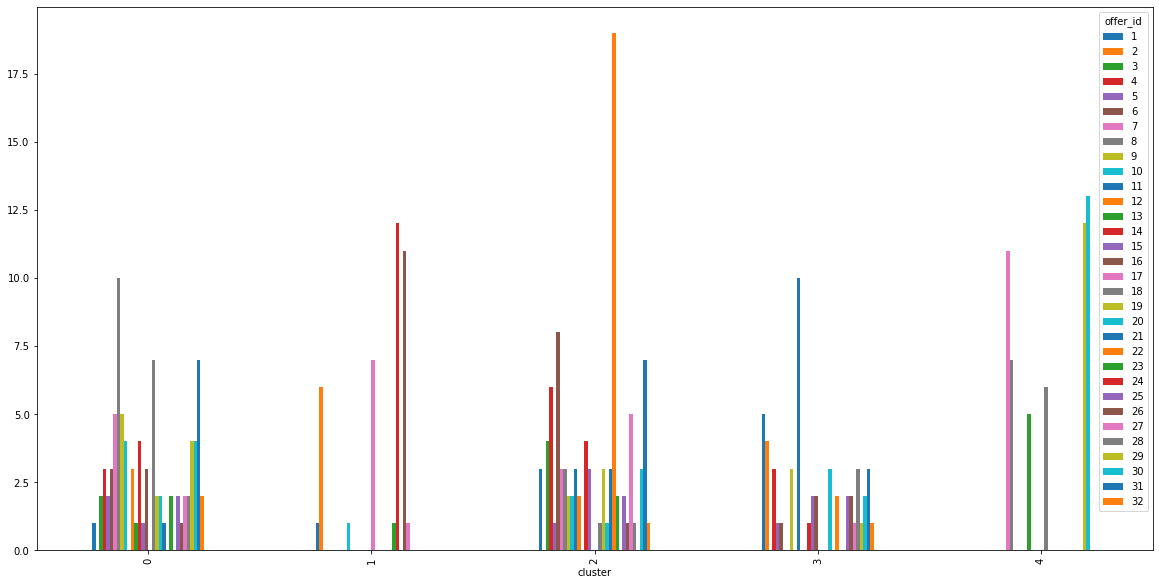

In [17]:
#顯示不同類客戶所購買的葡萄酒種類，以客戶類別為x軸
df_pivot1.groupby('cluster').sum().plot(kind='bar',figsize=(20,10))

<AxesSubplot:xlabel='offer_id'>

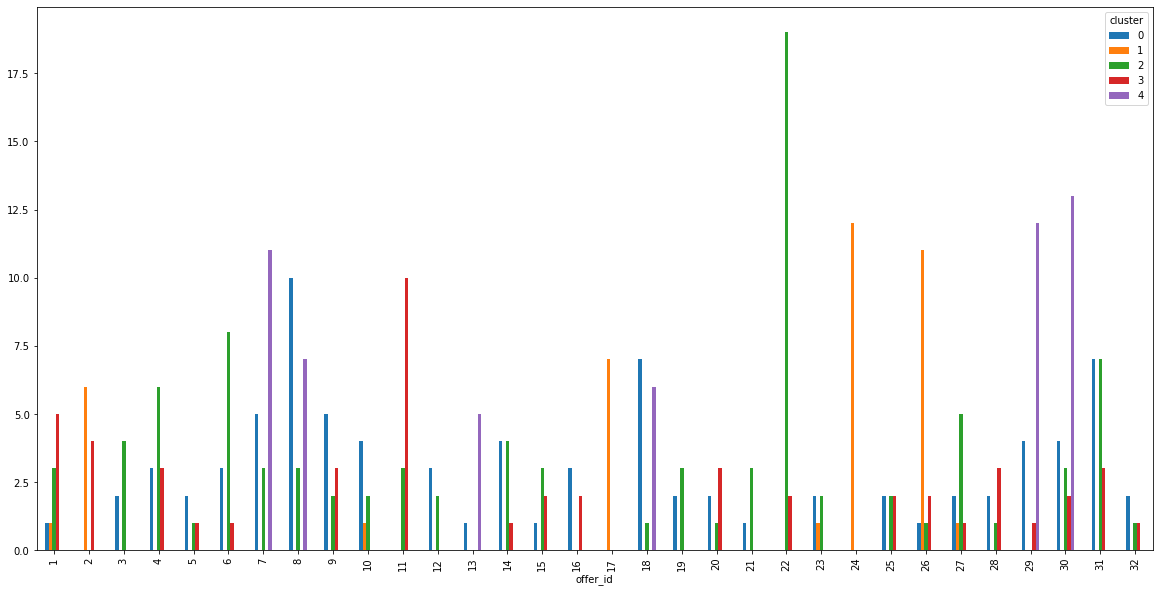

In [18]:
#顯示不同類客戶所購買的葡萄酒種類，以葡萄酒種類為x軸
df_pivot1.groupby('cluster').sum().T.plot(kind='bar',figsize=(20,10))

<AxesSubplot:xlabel='offer_id'>

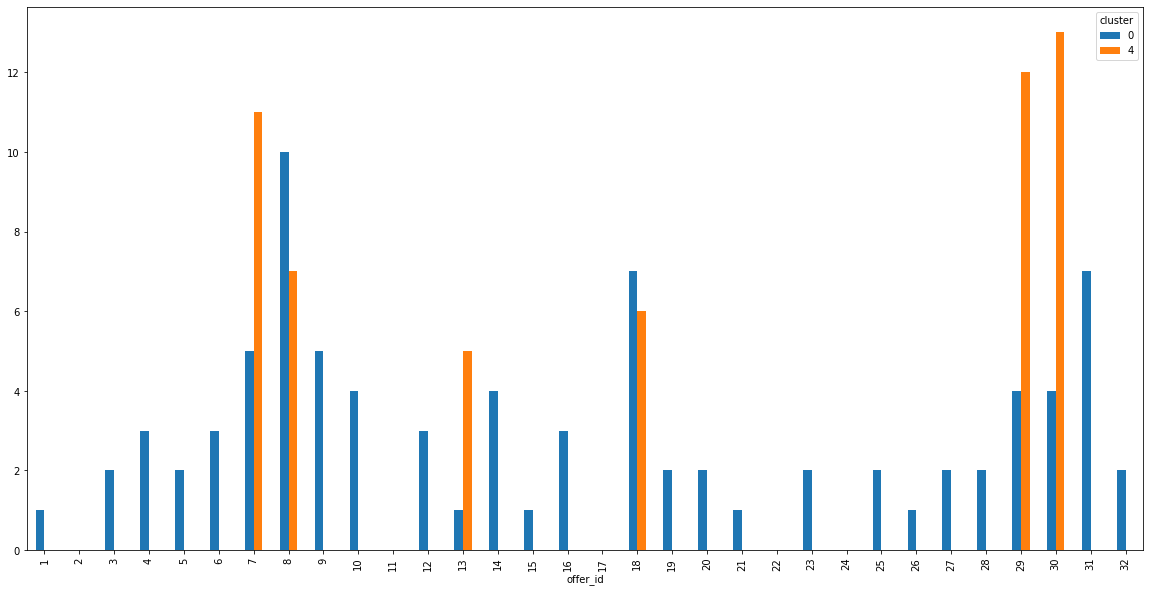

In [19]:
#比較0與4類客戶所購買的葡萄酒種類
df_pivot1[(df_pivot1['cluster']==0) | (df_pivot1['cluster']==4)].groupby('cluster').sum().T.plot(kind='bar',figsize=(20,10))

<AxesSubplot:xlabel='offer_id'>

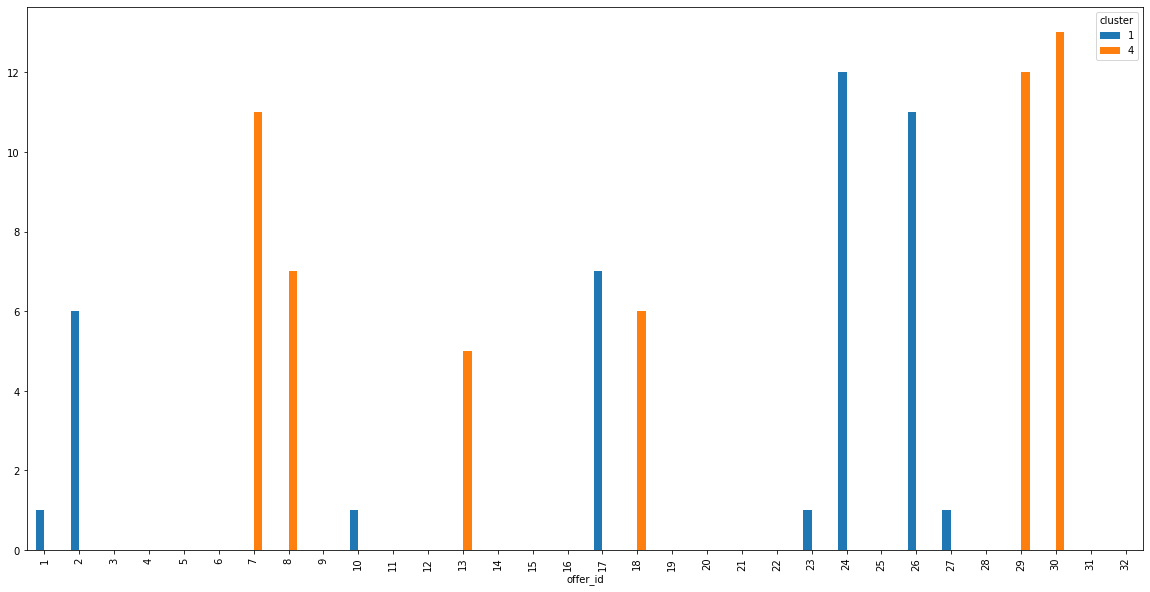

In [20]:
#比較1與4類客戶所購買的葡萄酒種類
df_pivot1[(df_pivot1['cluster']==1) | (df_pivot1['cluster']==4)].groupby('cluster').sum().T.plot(kind='bar',figsize=(20,10))

<AxesSubplot:xlabel='offer_id'>

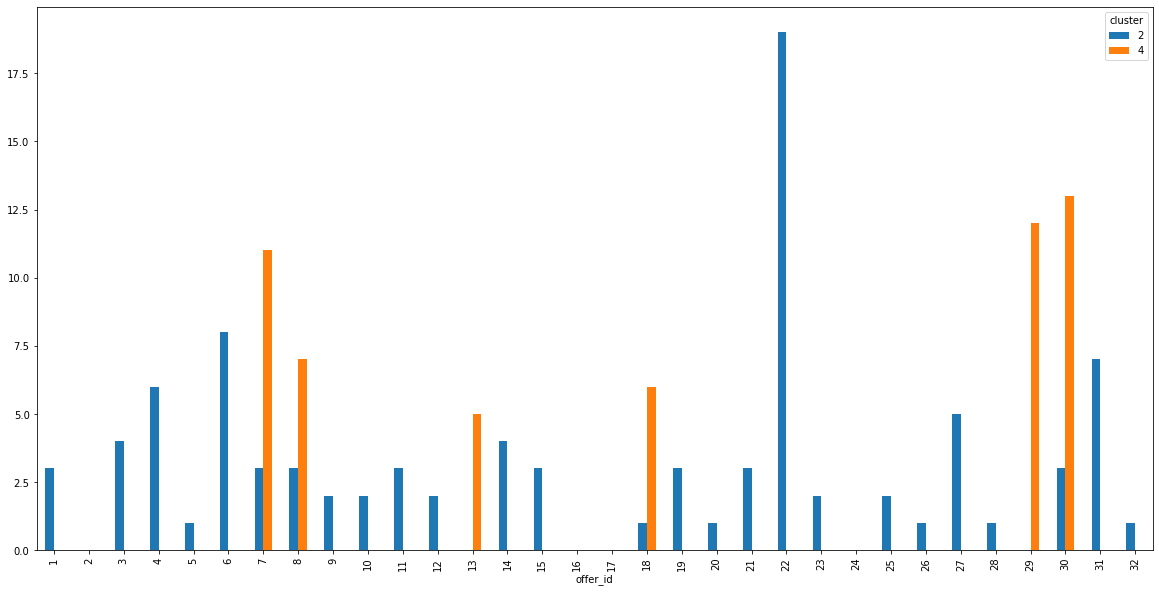

In [21]:
#比較2與4類客戶所購買的葡萄酒種類
df_pivot1[(df_pivot1['cluster']==2) | (df_pivot1['cluster']==4)].groupby('cluster').sum().T.plot(kind='bar',figsize=(20,10))

<AxesSubplot:xlabel='offer_id'>

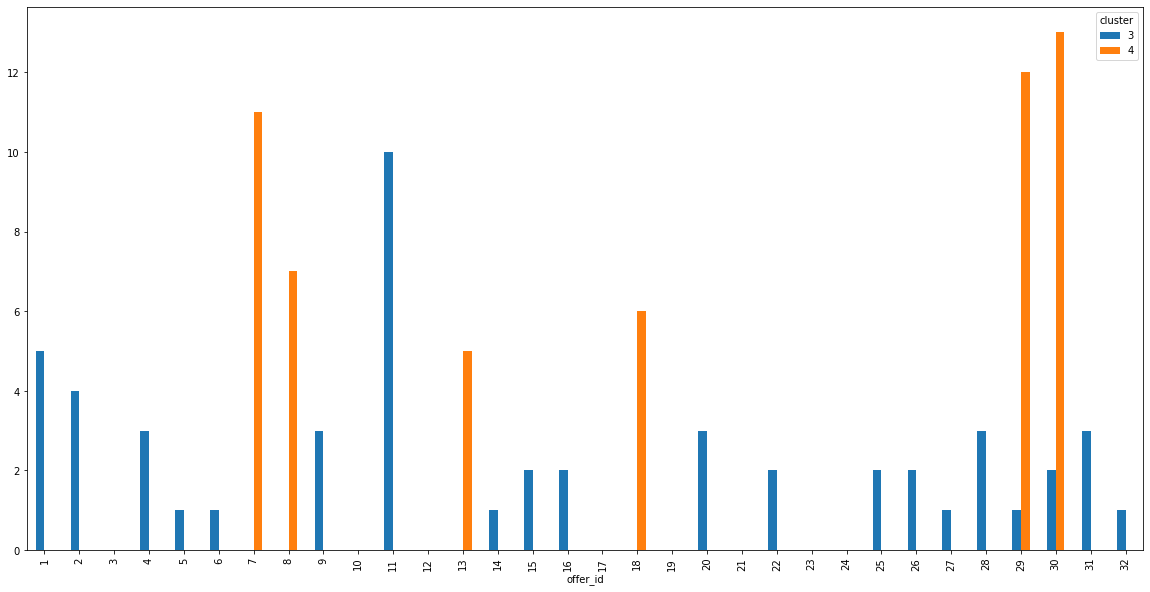

In [22]:
#比較3與4類客戶所購買的葡萄酒種類
df_pivot1[(df_pivot1['cluster']==3) | (df_pivot1['cluster']==4)].groupby('cluster').sum().T.plot(kind='bar',figsize=(20,10))

<AxesSubplot:xlabel='offer_id'>

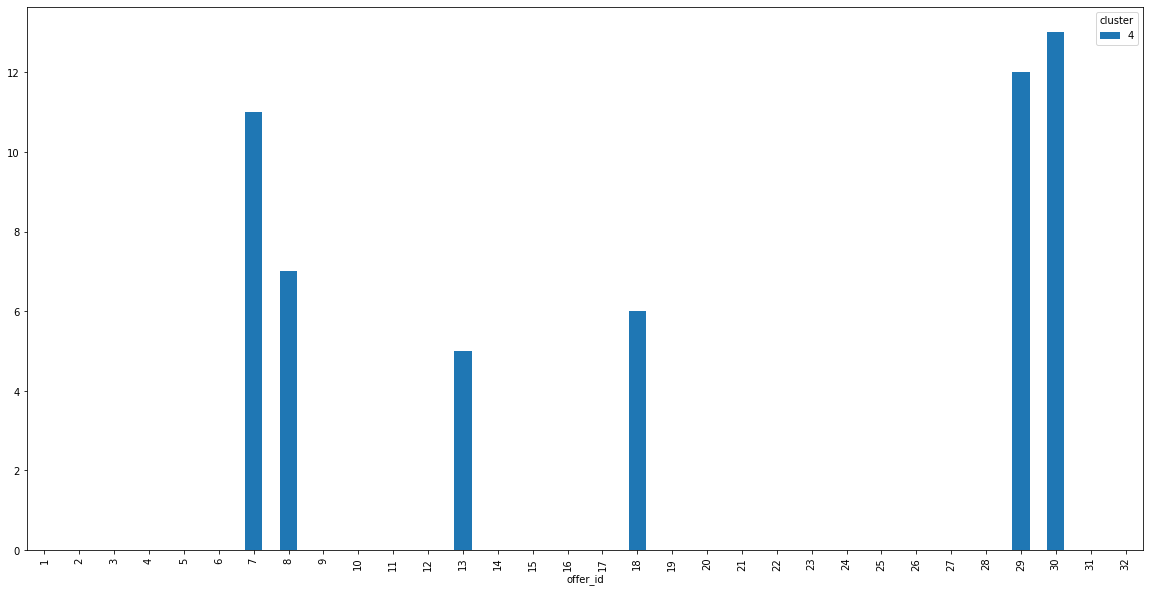

In [23]:
df_pivot1[(df_pivot1['cluster']==4)].groupby('cluster').sum().T.plot(kind='bar',figsize=(20,10))

<AxesSubplot:xlabel='offer_id'>

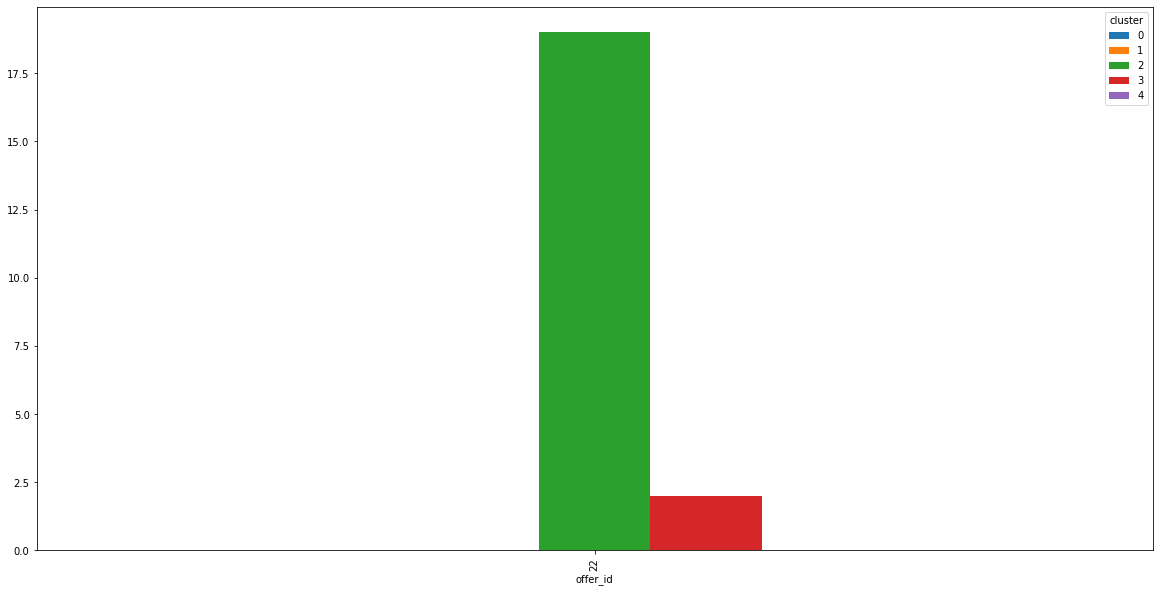

In [24]:
df_pivot1[[22,'cluster']].groupby('cluster').sum().T.plot(kind='bar',figsize=(20,10))

In [25]:
KMeans3 = KMeans(n_clusters=3).fit_predict(df_pivot1)
KMeans3

C:\Users\Admin\.conda\envs\pyml\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([1, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 1, 2, 2, 0, 0, 0, 1, 2, 1, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0,
       1, 2, 1, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 1, 2,
       0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 2, 2])

In [26]:
df_pivot1['cluster']=KMeans3

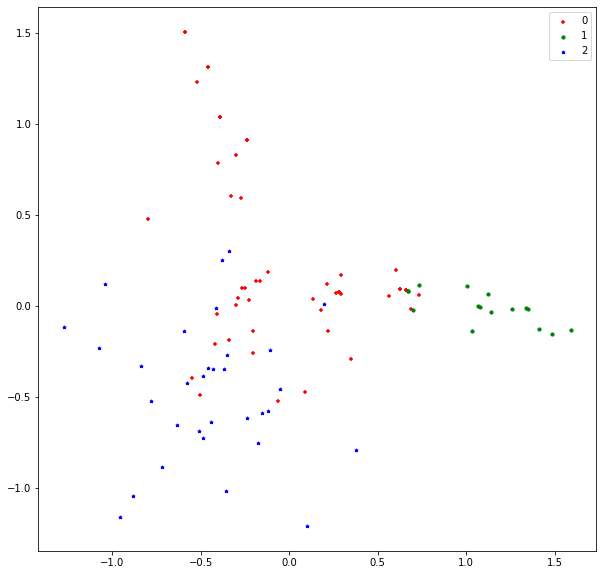

In [27]:
colors = ['r', 'g', 'b', 'y', 'c', 'm','k','p']
markers= ['+','o','*','^','s','p','D','>']
plt.figure(figsize=(10,10))

for i in range(3):
        points = np.array([df_pivot1_pca2[j] for j in range(len(df_pivot1_pca2)) if KMeans3[j] == i])
        plt.scatter(points[:, 0], points[:, 1], c=colors[i],marker=markers[i],s=10,label=i)
        
plt.legend()        
plt.show()

<AxesSubplot:xlabel='cluster'>

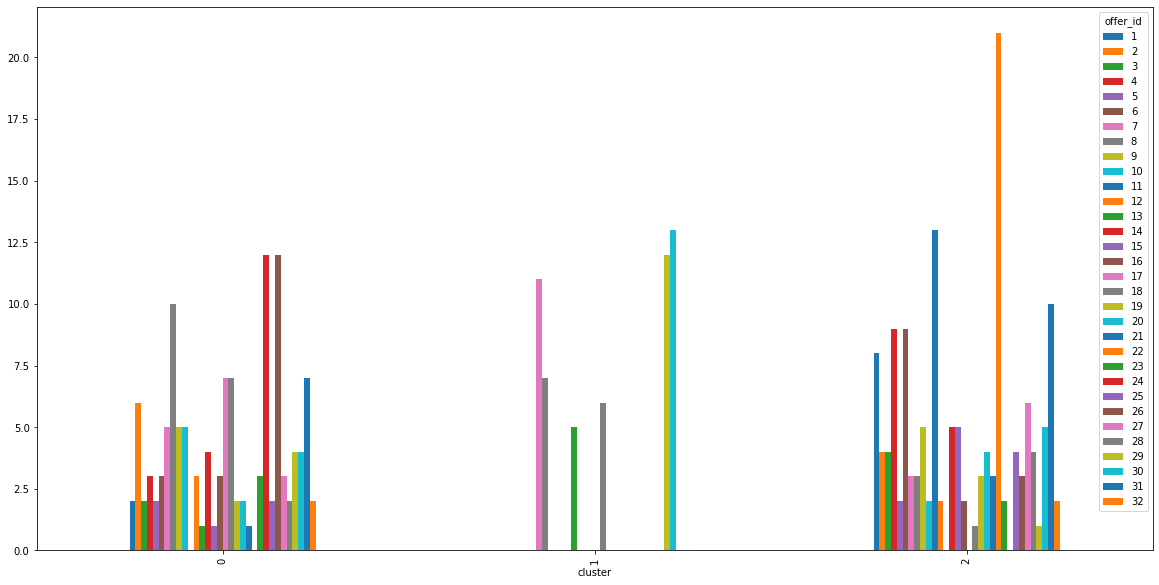

In [28]:
df_pivot1.groupby('cluster').sum().plot(kind='bar',figsize=(20,10))

C:\Users\Admin\.conda\envs\pyml\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


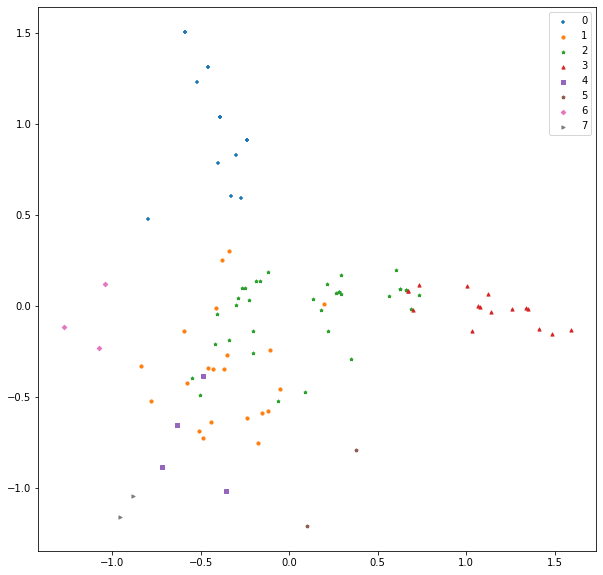

In [29]:
KMeans8 = KMeans(n_clusters=8).fit_predict(df_pivot1)
df_pivot1['cluster']=KMeans8

colors = ['r', 'g', 'b', 'y', 'c', 'm','k','p']
markers= ['+','o','*','^','s','p','D','>']

plt.figure(figsize=(10,10))

for i in range(8):
        points = np.array([df_pivot1_pca2[j] for j in range(len(df_pivot1_pca2)) if KMeans8[j] == i])
        plt.scatter(points[:, 0], points[:, 1], marker=markers[i],s=10,label=i)
        
plt.legend()        
plt.show()

<AxesSubplot:xlabel='cluster'>

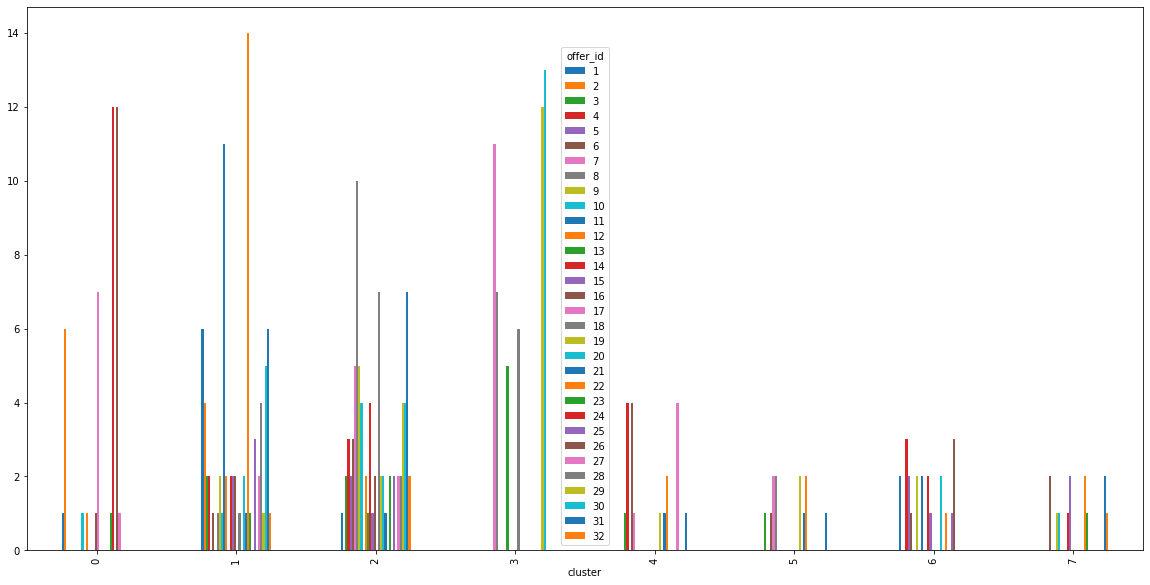

In [30]:
df_pivot1.groupby('cluster').sum().plot(kind='bar',figsize=(20,10))